In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

from tqdm import tqdm

In [ ]:
!ls 

In [33]:
ds_cfd = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_cfd.nc")
ds_fd = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_fd.nc")
ds_csu = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_csu.nc")
ds_id = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_id.nc")
ds_su = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_su.nc")

ds_cdd = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_cdd.nc")
ds_cwd = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_cwd.nc")
ds_pd = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_pd.nc")
ds_rr1 = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rr1.nc")
ds_rx1day = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rx1day.nc")
ds_rx5day = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rx5day.nc")
ds_sdii = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_sdii.nc")

In [34]:
lons, lats = np.meshgrid(ds_cdd.lon, ds_cdd.lat)

In [35]:
psr = xr.open_dataset("../../data/sweden/mescan-surfex_pine_spruce.nc")

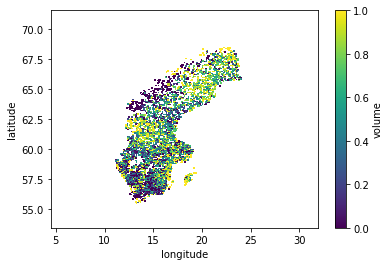

In [36]:
psr.volume.plot()

In [37]:
data = {
    "ratio": psr.volume.values.ravel()
}

In [38]:
data["cfd"] = ds_cfd.number_of_cfd_periods_with_more_than_5days_per_time_period.values.ravel()
data["fd"] = ds_fd.frost_days_index_per_time_period.values.ravel()
data["csu"] = ds_csu.number_of_csu_periods_with_more_than_5days_per_time_period.values.ravel()
data["id"] = ds_id.ice_days_index_per_time_period.values.ravel()
data["su"] = ds_su.summer_days_index_per_time_period.values.ravel()

In [39]:
data["cdd"] = ds_cdd.number_of_cdd_periods_with_more_than_5days_per_time_period.values.ravel()
data["cwd"] = ds_cwd.number_of_cwd_periods_with_more_than_5days_per_time_period.values.ravel()
data["pd"] = ds_pd.precipitation_days_index_per_time_period.values.ravel()
data["rr1"] = ds_rr1.wet_days_index_per_time_period.values.ravel()
data["rx1day"] = ds_rx1day.highest_one_day_precipitation_amount_per_time_period.values.ravel()
data["rx5day"] = ds_rx5day.highest_five_day_precipitation_amount_per_time_period.values.ravel()
data["sdii"] = ds_sdii.simple_daily_intensity_index_per_time_period.values.ravel()

In [40]:
df = pd.DataFrame(data)

In [41]:
df.head()

,ratio,cfd,fd,csu,id,su,cdd,cwd,rr1,rx1day,rx5day
0,NaN,3.0,72.0,0.0,21.0,0.0,171.0,56.0,2147.0,46.463284,46.463284
1,NaN,3.0,80.0,0.0,23.0,0.0,172.0,53.0,2137.0,45.531666,45.531666
2,NaN,3.0,90.0,0.0,28.0,0.0,171.0,51.0,2131.0,51.473633,51.473633
3,NaN,3.0,96.0,0.0,31.0,0.0,172.0,55.0,2142.0,57.756439,57.756439
4,NaN,3.0,100.0,0.0,34.0,0.0,169.0,57.0,2161.0,63.826298,63.826298


In [42]:
df1 = df.dropna(inplace=False)
df1 = df[df["ratio"] > 0]
df1.columns[1:]

Index(['cfd', 'fd', 'csu', 'id', 'su', 'cdd', 'cwd', 'rr1', 'rx1day',
       'rx5day'],
      dtype='object')

In [43]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df1[df1.columns[1:]], df1["ratio"])

In [45]:
X_train

,cfd,fd,csu,id,su,cdd,cwd,rr1,rx1day,rx5day
76824,97.0,2721.0,0.0,1676.0,54.0,213.0,21.0,1590.0,47.829571,47.829571
67883,97.0,2460.0,2.0,1474.0,73.0,183.0,39.0,2038.0,35.260197,35.260197
93897,112.0,2223.0,0.0,1212.0,30.0,145.0,144.0,2786.0,67.238068,67.238068
28479,30.0,558.0,0.0,289.0,0.0,225.0,20.0,1601.0,51.035339,51.035339
37699,34.0,740.0,0.0,424.0,0.0,204.0,25.0,1742.0,49.128250,49.128250
70853,81.0,2852.0,0.0,1945.0,7.0,134.0,88.0,2532.0,65.906502,65.906502
49522,50.0,1024.0,0.0,535.0,0.0,224.0,11.0,1447.0,51.370789,51.370789
83002,46.0,786.0,0.0,374.0,0.0,151.0,124.0,2606.0,60.893524,60.893524
43252,75.0,1751.0,7.0,826.0,148.0,215.0,25.0,1546.0,45.590298,45.590298
37023,38.0,781.0,0.0,382.0,1.0,225.0,13.0,1461.0,35.031353,35.031353


In [46]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
y_pred = rf.predict(X_test)

In [48]:
mean_squared_error(y_test, y_pred)

0.08541243793834111

In [49]:
r2_score(y_test, y_pred)

0.08751291728650423

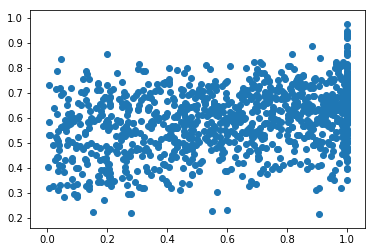

In [50]:
plt.scatter(y_test, y_pred)

In [51]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [52]:
df_results

,observed,predicted
75814,0.322810,0.521931
89905,0.033425,0.616649
56752,0.907078,0.213962
89301,0.361330,0.625307
83375,0.258277,0.526035
79126,0.385143,0.577181
30499,0.854942,0.767925
30157,0.368428,0.717633
85951,1.000000,0.765770
78767,0.679560,0.569461


In [53]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [54]:
feature_importances

,importance
id,0.139098
cwd,0.136008
fd,0.130543
rr1,0.120778
cdd,0.115139
cfd,0.096734
rx1day,0.084591
rx5day,0.083397
su,0.080106
csu,0.013608


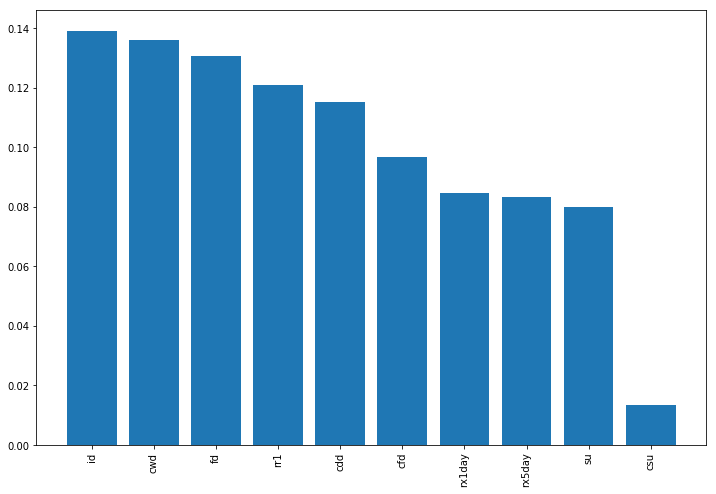

In [55]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()